In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\Concrete_Data_Yeh.csv')
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

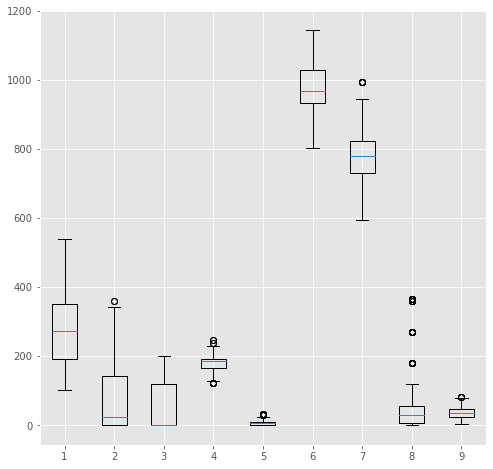

In [5]:
plt.figure(figsize=(8, 8))
plt.boxplot(df)
plt.show()

In [6]:
from scipy import stats
import numpy as np

In [7]:
df.shape

(1030, 9)

In [8]:
z = stats.zscore(df)
z.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


In [9]:
z_mask = (np.abs(z) < 2).all(axis=1)
df_1 = df[z_mask]
df_1.shape

(764, 9)

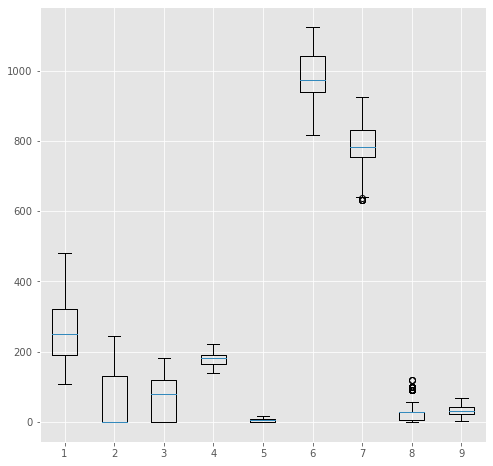

In [10]:
plt.figure(figsize=(8, 8))
plt.boxplot(df_1)
plt.show()

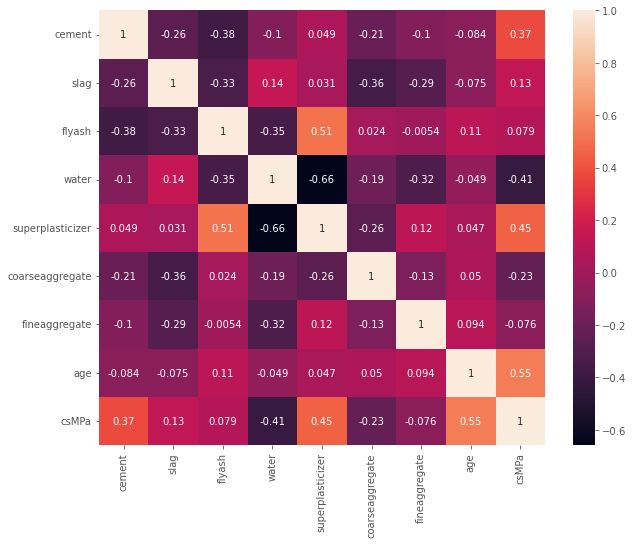

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_1.corr(), annot= True)
plt.show()

In [12]:
import graphviz

<Figure size 1080x1080 with 0 Axes>

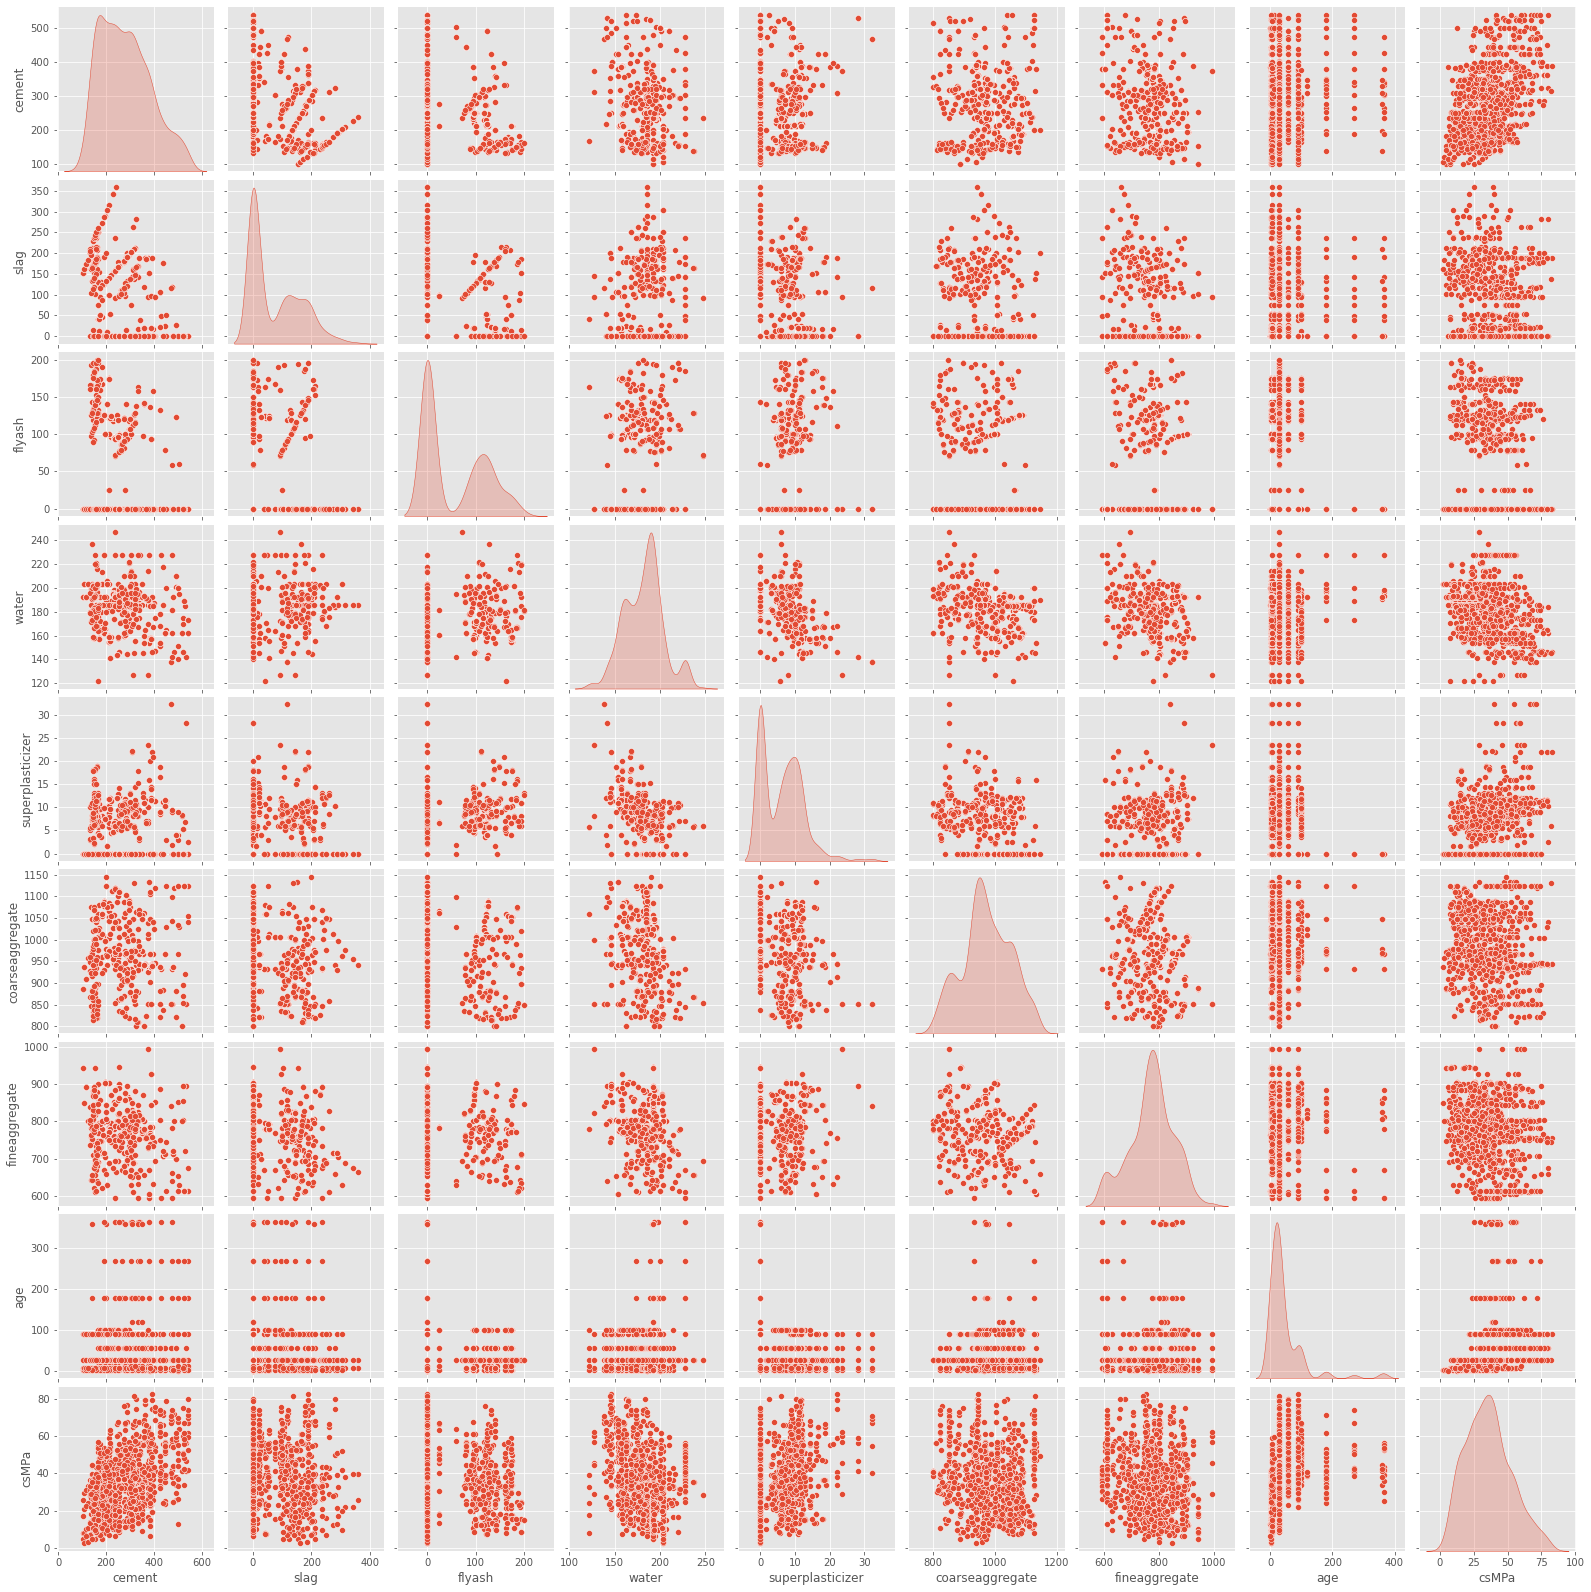

In [13]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, kind = 'scatter', diag_kind = 'kde')
plt.show()

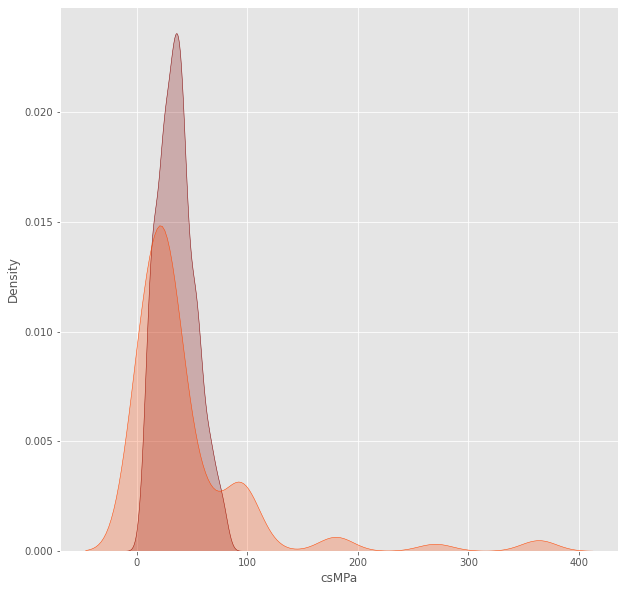

In [14]:
plt.figure(figsize=(10, 10))
sns.kdeplot(df['csMPa'], fill=True, color = 'maroon')
sns.kdeplot(df['age'], fill=True, color = 'orangered')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
X = df_1.drop('csMPa', axis = 1)
y = df_1['csMPa']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print('MAE:', mean_absolute_error(y_pred, y_test).round(2))
print('MSE:', mean_squared_error(y_pred, y_test).round(2))
print('RMSE:', np.sqrt(mean_absolute_error(y_pred, y_test)).round(2))
print('R2_score:', r2_score(y_pred, y_test).round(2))
print('-'*20)
df_lr = pd.DataFrame({
    'Test':y_test,
    'Predict': y_pred
})
df_lr

MAE: 5.18
MSE: 41.07
RMSE: 2.28
R2_score: 0.78
--------------------


,Test,Predict
497,44.03,47.947827
397,29.16,25.820949
1011,43.80,40.952332
317,44.14,44.206213
473,51.02,54.289649
...,...,...
169,65.20,75.582585
757,18.13,18.220605
482,56.14,62.961164
464,56.81,55.179085


In [20]:
params = {
    'learning_rate':0.03,
    'n_estimators':200,
    'criterion':'mse',
    'min_samples_split':16,
    'min_samples_leaf':16
}

gbr = GradientBoostingRegressor(**params)
model_gbr = gbr.fit(X_train, y_train)
y_pred_gbr = model_gbr.predict(X_test)
print('MAE_gbr:', mean_absolute_error(y_pred_gbr, y_test).round(2))
print('MSE_gbr:', mean_squared_error(y_pred_gbr, y_test).round(2))
print('RMSE_gbr:', np.sqrt(mean_absolute_error(y_pred_gbr, y_test)).round(2))
print('R2_score_gbr:', r2_score(y_pred_gbr, y_test).round(2))
print('-'*20)
df_gbr = pd.DataFrame({
    'Test':y_test,
    'Predict': y_pred_gbr
})
df_gbr

MAE_gbr: 3.72
MSE_gbr: 22.53
RMSE_gbr: 1.93
R2_score_gbr: 0.87
--------------------


,Test,Predict
497,44.03,56.862766
397,29.16,26.954383
1011,43.80,41.884804
317,44.14,52.455549
473,51.02,54.277156
...,...,...
169,65.20,64.561982
757,18.13,18.579509
482,56.14,62.022967
464,56.81,51.129606


In [21]:
xgb = XGBRegressor()
model_xgb = xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print('MAE_xgb:', mean_absolute_error(y_pred_xgb, y_test).round(2))
print('MSE_xgb:', mean_squared_error(y_pred_xgb, y_test).round(2))
print('RMSE_xgb:', np.sqrt(mean_absolute_error(y_pred_xgb, y_test)).round(2))
print('R2_score_xgb:', r2_score(y_pred_xgb, y_test).round(2))
print('-'*20)
df_xgb = pd.DataFrame({
    'Test':y_test,
    'Predict': y_pred_xgb
})
df_xgb

MAE_xgb: 2.81
MSE_xgb: 16.07
RMSE_xgb: 1.68
R2_score_xgb: 0.92
--------------------


,Test,Predict
497,44.03,52.565804
397,29.16,30.023567
1011,43.80,42.383385
317,44.14,43.997440
473,51.02,56.572002
...,...,...
169,65.20,65.169060
757,18.13,18.002588
482,56.14,58.372139
464,56.81,55.189114


In [23]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators = [('lr',lr), ('gbr',gbr), ('xgb',xgb)])
model = vr.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MAE:', mean_absolute_error(y_pred, y_test).round(2))
print('MSE:', mean_squared_error(y_pred, y_test).round(2))
print('RMSE:', np.sqrt(mean_absolute_error(y_pred, y_test)).round(2))
print('R2_score:', r2_score(y_pred, y_test).round(2))
print('-'*20)
df = pd.DataFrame({
    'Test':y_test,
    'Predict': y_pred
})
df

MAE: 3.33
MSE: 18.51
RMSE: 1.82
R2_score: 0.9
--------------------


,Test,Predict
497,44.03,52.458799
397,29.16,27.599633
1011,43.80,41.740174
317,44.14,46.886401
473,51.02,55.046269
...,...,...
169,65.20,68.437876
757,18.13,18.267568
482,56.14,61.118757
464,56.81,53.832602


In [24]:
print('Train set score: ', cross_val_score(xgb, X_train, y_train, cv = 4, scoring='r2').mean())
print('Test set score: ', cross_val_score(xgb, X_test, y_test, cv = 4, scoring='r2').mean())

Train set score:  0.9004380945112502
Test set score:  0.7008303357355647


In [25]:
print('Train set score: ', cross_val_score(vr, X_train, y_train, cv = 4, scoring='r2').mean())
print('Test set score: ', cross_val_score(vr, X_test, y_test, cv = 4, scoring='r2').mean())

Train set score:  0.8918172795087732
Test set score:  0.7789571591298285


In [26]:
print('Train set score: ', cross_val_score(gbr, X_train, y_train, cv = 4, scoring='r2').mean())
print('Test set score: ', cross_val_score(gbr, X_test, y_test, cv = 4, scoring='r2').mean())

Train set score:  0.8831266932054765
Test set score:  0.7178166086633513


In [27]:
print('Train set score: ', cross_val_score(lr, X_train, y_train, cv = 4, scoring='r2').mean())
print('Test set score: ', cross_val_score(lr, X_test, y_test, cv = 4, scoring='r2').mean())

Train set score:  0.7501611985018374
Test set score:  0.7446749048782901


In the end VotingRegressor showed the best result on the test data, 
literally dropping 0.1 on the training data compared to the training data on XGBRegressor